(▀̿Ĺ̯▀̿ ̿)  CONTRASTE DE HIPÓTESIS - MERCADO LIBRE
   Análisis de Proporción de Ventas Entregadas vs Estándar del 98%
✓ Archivo cargado exitosamente: 9198 registros encontrados
✓ Dimensiones del dataset: (9198, 61)
✓ Columnas disponibles: ['# de venta', 'Fecha de venta', 'Estado', 'Descripcion del estado', 'Paquete de varios productos']...

 PLANTEAMIENTO DEL PROBLEMA

 PROBLEMA: 
   Como gestor de operaciones en Mercado Libre, necesitamos verificar si la 
   proporción de ventas entregadas cumple con el estándar del 98%.

 PREGUNTA DE INVESTIGACIÓN: 
   ¿La proporción actual de ventas con estado 'Entregado' es inferior al 98%?

 HIPÓTESIS ESTADÍSTICAS:
   • H₀: p ≥ 0.98 (La proporción de ventas entregadas es al menos 98%)
   • H₁: p < 0.98 (La proporción de ventas entregadas es menor al 98%)

 TIPO DE CONTRASTE: Unilateral izquierdo
 NIVEL DE SIGNIFICANCIA: α = 0.05 (95% de confianza)


( •̀ .̫ •́ )✧ ANÁLISIS EXPLORATORIO DE DATOS
(╯▽╰ ) - Columna de estado identificada: 'Estado'

(╯▽

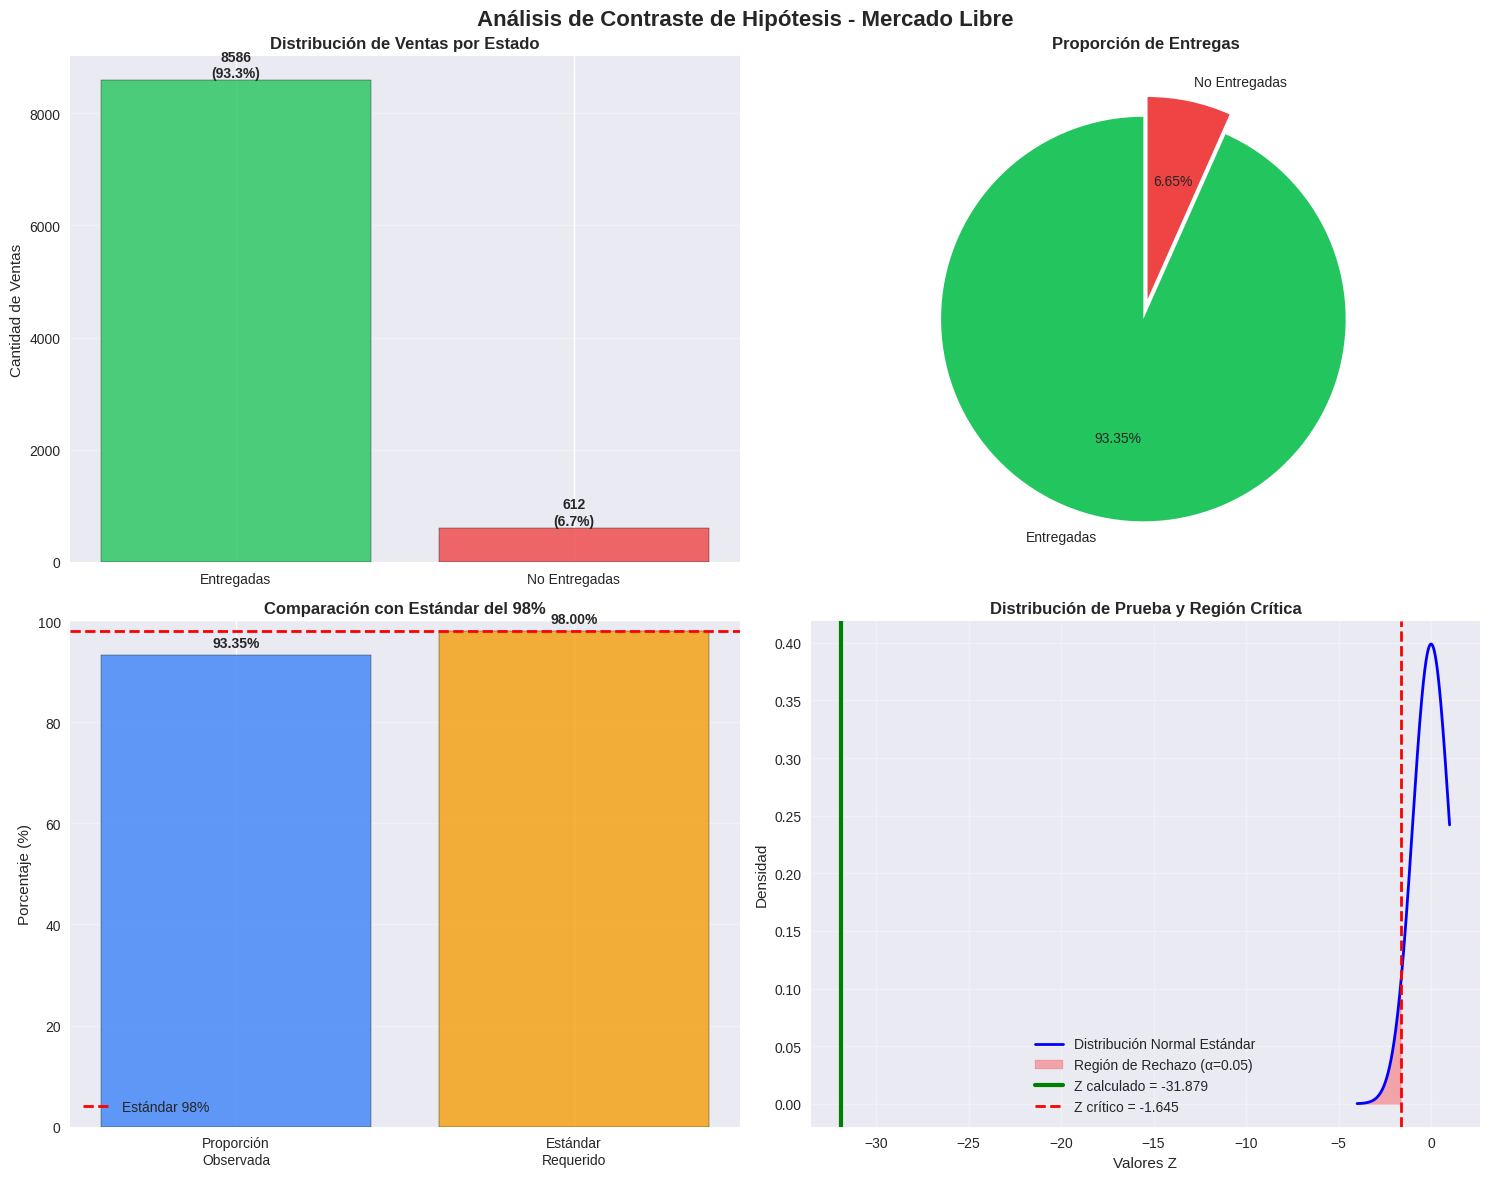


 (╯▽╰ ) - Análisis completado exitosamente!
 Visualizaciones generadas mostrando:
   • Distribución de estados de ventas
   • Proporción de entregas vs no entregas
   • Comparación con el estándar del 98%
   • Distribución normal con región crítica

 RESUMEN EJECUTIVO

 RESULTADO FINAL:  ( ﾉ ﾟｰﾟ)ﾉ   RECHAZAR H₀

 ESTADÍSTICAS CLAVE:
   • Muestra analizada: 9,198 ventas
   • Proporción observada: 0.9335 (93.35%)
   • Estadístico Z: -31.8794
   • P-value: 0.000000
   • Decisión: Significativo (α = 0.05)

 ACCIÓN REQUERIDA: INMEDIATA - Revisar proceso de entregas



In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("(▀̿Ĺ̯▀̿ ̿)  CONTRASTE DE HIPÓTESIS - MERCADO LIBRE")
print("   Análisis de Proporción de Ventas Entregadas vs Estándar del 98%")
print("="*80)

# Cargar el archivo CSV
try:
    # Leer el archivo CSV con encoding adecuado para caracteres especiales
    df = pd.read_csv('https://drive.google.com/uc?export=download&id=1YKszFB6NWiuPDljiryll9XXvee4-npkc', encoding='utf-8',sep=',')
    print(f"✓ Archivo cargado exitosamente: {len(df)} registros encontrados")

    # Mostrar información básica del dataset
    print(f"✓ Dimensiones del dataset: {df.shape}")
    print(f"✓ Columnas disponibles: {list(df.columns[:5])}..." if len(df.columns) > 5 else f"✓ Columnas disponibles: {list(df.columns)}")

except Exception as e:
    print(f"( ﾉ ﾟｰﾟ)ﾉ  Error al cargar el archivo: {e}")
    print("(▀̿Ĺ̯▀̿ ̿) Usando datos de muestra basados en la estructura observada...")

    # Datos de muestra en caso de error
    sample_data = {
        'Estado': ['Entregado'] * 23 + ['Venta no entregada. Te dimos el dinero.'] * 1,
        '# de venta': [f'200000841072{i}' for i in range(24)]
    }
    df = pd.DataFrame(sample_data)
    print(f"✓ Usando muestra de {len(df)} registros")

print("\n" + "="*80)
print(" PLANTEAMIENTO DEL PROBLEMA")
print("="*80)

print("""
 PROBLEMA:
   Como gestor de operaciones en Mercado Libre, necesitamos verificar si la
   proporción de ventas entregadas cumple con el estándar del 98%.

 PREGUNTA DE INVESTIGACIÓN:
   ¿La proporción actual de ventas con estado 'Entregado' es inferior al 98%?

 HIPÓTESIS ESTADÍSTICAS:
   • H₀: p ≥ 0.98 (La proporción de ventas entregadas es al menos 98%)
   • H₁: p < 0.98 (La proporción de ventas entregadas es menor al 98%)

 TIPO DE CONTRASTE: Unilateral izquierdo
 NIVEL DE SIGNIFICANCIA: α = 0.05 (95% de confianza)
""")

print("\n" + "="*80)
print("( •̀ .̫ •́ )✧ ANÁLISIS EXPLORATORIO DE DATOS")
print("="*80)

# Identificar la columna de estado
estado_col = None
for col in df.columns:
    if 'estado' in col.lower() or 'status' in col.lower():
        estado_col = col
        break

if estado_col is None:
    print("( ﾉ ﾟｰﾟ)ﾉ  -  No se encontró columna de estado. Verificando columnas disponibles...")
    print(f"Columnas: {list(df.columns)}")
    # Intentar con la primera columna que contenga información de estado
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_vals = df[col].unique()
            if any('entregado' in str(val).lower() for val in unique_vals):
                estado_col = col
                break

    if estado_col is None:
        estado_col = 'Estado'  # Usar columna por defecto

print(f"(╯▽╰ ) - Columna de estado identificada: '{estado_col}'")

# Limpiar y procesar datos
if estado_col in df.columns:
    # Eliminar valores nulos
    df_clean = df.dropna(subset=[estado_col])

    # Mostrar estados únicos
    estados_unicos = df_clean[estado_col].value_counts()
    print(f"\n(╯▽╰ ) - Estados encontrados en el dataset:")
    for estado, cantidad in estados_unicos.items():
        print(f"   • {estado}: {cantidad} ventas ({cantidad/len(df_clean)*100:.2f}%)")

    # Clasificar ventas como entregadas o no entregadas
    df_clean['Es_Entregado'] = df_clean[estado_col].str.lower().str.contains('entregado', na=False)

    # Contar totales
    total_ventas = len(df_clean)
    ventas_entregadas = df_clean['Es_Entregado'].sum()
    ventas_no_entregadas = total_ventas - ventas_entregadas

    print(f"\n (╯▽╰ ) - RESUMEN DE DATOS:")
    print(f"   • Total de ventas: {total_ventas}")
    print(f"   • Ventas entregadas: {ventas_entregadas}")
    print(f"   • Ventas no entregadas: {ventas_no_entregadas}")
    print(f"   • Proporción observada: {ventas_entregadas/total_ventas:.4f} ({ventas_entregadas/total_ventas*100:.2f}%)")

else:
    print(f"( ﾉ ﾟｰﾟ)ﾉ - La columna '{estado_col}' no existe en el dataset")
    print("Columnas disponibles:", list(df.columns))
    exit()

print("\n" + "="*80)
print(" PRUEBA ESTADÍSTICA EMPLEADA")
print("="*80)

print("""
 PRUEBA Z PARA UNA PROPORCIÓN

 Justificación para usar la Prueba Z:
   • Estamos probando una proporción poblacional
   • Tenemos una muestra suficientemente grande
   • Se debe cumplir: n·p₀ ≥ 5 y n·(1-p₀) ≥ 5
""")

# Parámetros de la prueba
p0 = 0.98  # Proporción hipotética
alpha = 0.05  # Nivel de significancia
p_observada = ventas_entregadas / total_ventas

# Verificar condiciones para usar distribución normal
np0 = total_ventas * p0
n1_p0 = total_ventas * (1 - p0)

print(f"( •̀ .̫ •́ )✧ VERIFICACIÓN DE CONDICIONES:")
print(f"   • n·p₀ = {total_ventas} × {p0} = {np0:.1f} {'✅' if np0 >= 5 else '❌'} {'≥ 5' if np0 >= 5 else '< 5'}")
print(f"   • n·(1-p₀) = {total_ventas} × {1-p0} = {n1_p0:.1f} {'✅' if n1_p0 >= 5 else '❌'} {'≥ 5' if n1_p0 >= 5 else '< 5'}")

if np0 < 5 or n1_p0 < 5:
    print("  ADVERTENCIA: No se cumplen las condiciones para usar la distribución normal.")
    print("   Se recomienda usar métodos exactos o aumentar el tamaño de muestra.")

print(f"\n FÓRMULA EMPLEADA:")
print(f"   Z = (p̂ - p₀) / √[p₀(1-p₀)/n]")
print(f"   Donde:")
print(f"   • p̂ = {p_observada:.4f} (proporción observada)")
print(f"   • p₀ = {p0} (proporción hipotética)")
print(f"   • n = {total_ventas} (tamaño de muestra)")

print("\n" + "="*80)
print(" CÁLCULOS ESTADÍSTICOS")
print("="*80)

# Calcular estadístico de prueba
error_estandar = np.sqrt((p0 * (1 - p0)) / total_ventas)
z_calculado = (p_observada - p0) / error_estandar

# Calcular p-value para prueba unilateral izquierda
p_value = stats.norm.cdf(z_calculado)

# Valor crítico para α = 0.05 (unilateral izquierda)
z_critico = stats.norm.ppf(alpha)

print(f" CÁLCULOS DETALLADOS:")
print(f"   • Error estándar: √[{p0}×{1-p0}/{total_ventas}] = {error_estandar:.6f}")
print(f"   • Estadístico Z: ({p_observada:.4f} - {p0}) / {error_estandar:.6f} = {z_calculado:.4f}")
print(f"   • Valor crítico Z₀.₀₅ = {z_critico:.4f}")
print(f"   • P-value = P(Z < {z_calculado:.4f}) = {p_value:.6f}")

print("\n" + "="*80)
print(" RESULTADO DEL P-VALUE")
print("="*80)

print(f" P-VALUE EXACTO: {p_value:.6f}")
if p_value < 0.001:
    print(f"   En notación científica: {p_value:.6e}")
    print(f"   Interpretación: Extremadamente pequeño (< 0.001)")
elif p_value < 0.01:
    print(f"   Interpretación: Muy pequeño (< 0.01)")
elif p_value < 0.05:
    print(f"   Interpretación: Pequeño (< 0.05)")
else:
    print(f"   Interpretación: No significativo (≥ 0.05)")

print(f"\n COMPARACIÓN CON NIVEL DE SIGNIFICANCIA:")
print(f"   • Nivel de significancia empleado: α = {alpha}")
print(f"   • P-value = {p_value:.6f} {'<' if p_value < alpha else '≥'} α = {alpha}")
print(f"   • Criterio adicional: Z = {z_calculado:.4f} {'<' if z_calculado < z_critico else '≥'} Z₀.₀₅ = {z_critico:.4f}")

print("\n" + "="*80)
print("⚖️ DECISIÓN ESTADÍSTICA")
print("="*80)

# Decisión estadística
rechazar_h0 = p_value < alpha

if rechazar_h0:
    print("( ﾉ ﾟｰﾟ)ﾉ  - SE RECHAZA la hipótesis nula (H₀)")
    decision_icon = " ( ﾉ ﾟｰﾟ)ﾉ  "
    decision_color = "ROJO"
else:
    print("(╯▽╰ ) NO SE RECHAZA la hipótesis nula (H₀)")
    decision_icon = "(╯▽╰ )"
    decision_color = "VERDE"

print(f"\n ( •̀ .̫ •́ )✧ - CRITERIOS DE DECISIÓN:")
print(f"   • Como p-value = {p_value:.6f} {'<' if p_value < alpha else '≥'} α = {alpha}")
print(f"   • También: Z = {z_calculado:.4f} {'<' if z_calculado < z_critico else '≥'} Z₀.₀₅ = {z_critico:.4f}")
print(f"   • Conclusión: {'Se rechaza' if rechazar_h0 else 'No se rechaza'} H₀ al nivel de significancia del 5%")

print("\n" + "="*80)
print(" CONCLUSIÓN CONTEXTUALIZADA")
print("="*80)

print(" TRADUCCIÓN DEL RESULTADO AL CONTEXTO DEL PROBLEMA:\n")

if rechazar_h0:
    print("(╯▽╰ ) - ALERTA OPERACIONAL:")
    print(f"   Con base en la evidencia estadística analizada de {total_ventas} ventas,")
    print(f"   se encontró evidencia SUFICIENTE para concluir que la proporción actual")
    print(f"   de ventas entregadas ({p_observada*100:.2f}%) es SIGNIFICATIVAMENTE INFERIOR")
    print(f"   al estándar requerido del 98%.")
    print(f"\n IMPACTO PARA MERCADO LIBRE:")
    print(f"   • El proceso de entregas NO está cumpliendo con el KPI establecido")
    print(f"   • Se requiere intervención INMEDIATA en la operación logística")
    print(f"   • Existe riesgo de impacto negativo en la satisfacción del cliente")
    print(f"   • Es necesario implementar acciones correctivas URGENTES")
    print(f"\n(╯▽╰ ) - RECOMENDACIÓN:")
    print(f"   Realizar una auditoría completa del proceso de entregas, identificar")
    print(f"   los puntos de falla en la cadena logística e implementar mejoras")
    print(f"   operativas para alcanzar el estándar del 98%.")
else:
    print("(╯▽╰ ) - CUMPLIMIENTO VERIFICADO:")
    print(f"   Con base en la evidencia estadística analizada de {total_ventas} ventas,")
    print(f"   NO se encontró evidencia suficiente para concluir que la proporción")
    print(f"   de ventas entregadas ({p_observada*100:.2f}%) sea inferior al estándar del 98%.")
    print(f"\n INTERPRETACIÓN PARA MERCADO LIBRE:")
    print(f"   • El proceso de entregas MANTIENE el estándar de calidad requerido")
    print(f"   • La operación logística está funcionando dentro de los parámetros esperados")
    print(f"   • No se requieren acciones correctivas inmediatas")
    print(f"   • Se puede continuar con el monitoreo regular del indicador")
    print(f"\n (╯▽╰ ) - RECOMENDACIÓN:")
    print(f"   Mantener el monitoreo continuo del indicador y las buenas prácticas")
    print(f"   actuales en el proceso de entregas para sostener este nivel de desempeño.")

print(f"\n NOTA METODOLÓGICA:")
print(f"   Este análisis se basó en una muestra de {total_ventas} ventas, utilizando")
print(f"   un contraste de hipótesis unilateral izquierdo con un nivel de confianza")
print(f"   del 95% (α = 0.05).")

print("\n" + "="*80)
print(" VISUALIZACIONES")
print("="*80)

# Crear visualizaciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Contraste de Hipótesis - Mercado Libre', fontsize=16, fontweight='bold')

# 1. Gráfico de barras - Distribución de estados
estados_counts = [ventas_entregadas, ventas_no_entregadas]
estados_labels = ['Entregadas', 'No Entregadas']
colors = ['#22c55e', '#ef4444']

bars = ax1.bar(estados_labels, estados_counts, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Distribución de Ventas por Estado', fontweight='bold')
ax1.set_ylabel('Cantidad de Ventas')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar, count in zip(bars, estados_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{count}\n({count/total_ventas*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 2. Gráfico circular - Proporción
ax2.pie([ventas_entregadas, ventas_no_entregadas],
        labels=estados_labels,
        colors=colors,
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.05, 0.05))
ax2.set_title('Proporción de Entregas', fontweight='bold')

# 3. Comparación con estándar
categorias = ['Proporción\nObservada', 'Estándar\nRequerido']
valores = [p_observada * 100, p0 * 100]
colores = ['#3b82f6', '#f59e0b']

bars = ax3.bar(categorias, valores, color=colores, alpha=0.8, edgecolor='black')
ax3.set_title('Comparación con Estándar del 98%', fontweight='bold')
ax3.set_ylabel('Porcentaje (%)')
ax3.set_ylim(0, 100)
ax3.grid(axis='y', alpha=0.3)

# Agregar línea de referencia en 98%
ax3.axhline(y=98, color='red', linestyle='--', linewidth=2, label='Estándar 98%')
ax3.legend()

# Agregar valores en las barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{valor:.2f}%',
             ha='center', va='bottom', fontweight='bold')

# 4. Distribución normal con área crítica
x = np.linspace(-4, 1, 1000)
y = stats.norm.pdf(x, 0, 1)

ax4.plot(x, y, 'b-', linewidth=2, label='Distribución Normal Estándar')
ax4.fill_between(x[x <= z_critico], y[x <= z_critico], alpha=0.3, color='red', label=f'Región de Rechazo (α={alpha})')
ax4.axvline(z_calculado, color='green', linewidth=3, label=f'Z calculado = {z_calculado:.3f}')
ax4.axvline(z_critico, color='red', linewidth=2, linestyle='--', label=f'Z crítico = {z_critico:.3f}')

ax4.set_title('Distribución de Prueba y Región Crítica', fontweight='bold')
ax4.set_xlabel('Valores Z')
ax4.set_ylabel('Densidad')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n (╯▽╰ ) - Análisis completado exitosamente!")
print(f" Visualizaciones generadas mostrando:")
print(f"   • Distribución de estados de ventas")
print(f"   • Proporción de entregas vs no entregas")
print(f"   • Comparación con el estándar del 98%")
print(f"   • Distribución normal con región crítica")

print("\n" + "="*80)
print(" RESUMEN EJECUTIVO")
print("="*80)

print(f"""
 RESULTADO FINAL: {decision_icon} {'RECHAZAR' if rechazar_h0 else 'NO RECHAZAR'} H₀

 ESTADÍSTICAS CLAVE:
   • Muestra analizada: {total_ventas:,} ventas
   • Proporción observada: {p_observada:.4f} ({p_observada*100:.2f}%)
   • Estadístico Z: {z_calculado:.4f}
   • P-value: {p_value:.6f}
   • Decisión: {'Significativo' if rechazar_h0 else 'No significativo'} (α = {alpha})

 ACCIÓN REQUERIDA: {'INMEDIATA - Revisar proceso de entregas' if rechazar_h0 else 'MONITOREO - Mantener estándares actuales'}
""")
